In [0]:
!ls

sample_data


# Importing required libraries and modules

In [0]:
import numpy as np
from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization, Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2

from keras.datasets import mnist

%matplotlib inline

Using TensorFlow backend.


# Loading the data

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


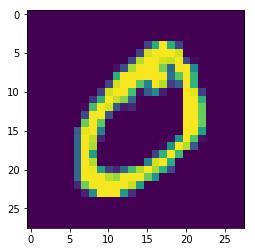

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

The below blocks of code shows the preprocessing that is performed on the image data.

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

### Image augmentation

Here, the image augmentation technique that is used is Image Normalization. Image Normalization helps in reducing overfitting of the model as well as makes all the image data to look like in a same spectrum. This will help in reducing the loss and there by increasing the accuracy of the model. 

### L2 Regularization

L2 regularization is used to reduce the overfitting of the model.


The main goal of bringing in Image Normalization and L2 Regularization is to improve the generalizm of the model. 

In [0]:
datagen = ImageDataGenerator(featurewise_center=True, 
                             featurewise_std_normalization=True)
datagen.fit(X_train)

In [0]:
model = Sequential()
 
model.add(Conv2D(16, (3, 3), input_shape=(28,28,1), kernel_regularizer=l2(0.01))) #26
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3), kernel_regularizer=l2(0.01))) #24
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(10, (1, 1), kernel_regularizer=l2(0.01))) #24
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Conv2D(16, (3, 3), kernel_regularizer=l2(0.01))) #12
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Conv2D(16, (3, 3), kernel_regularizer=l2(0.01))) #10
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Conv2D(16, (3, 3), kernel_regularizer=l2(0.01))) #8
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Conv2D(16, (3, 3), kernel_regularizer=l2(0.01))) #6
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Conv2D(10, (4, 4), kernel_regularizer=l2(0.01))) #4
model.add(BatchNormalization())


model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 10)        330       
__________

Creating a filepath to store the best model. This will help us in figuring out which are the different classes of image which are getting misclassified.

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
batch_size = 32
filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
model_checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [0]:
def scheduler(epoch, lr):
    return round(0.003 * 1/(1 + 0.319 * epoch), 10)

In [0]:
history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch_size),
                              steps_per_epoch = X_train.shape[0] // batch_size,
                              epochs=40, verbose=1, 
                              validation_data=(X_test, Y_test),
                              callbacks=[LearningRateScheduler(scheduler, verbose=1), model_checkpoint])

Instructions for updating:
Use tf.cast instead.
Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
1875/1875 [==============================] - 46s 25ms/step - loss: 0.5413 - acc: 0.9334 - val_loss: 1.8010 - val_acc: 0.5098

Epoch 00001: val_acc improved from -inf to 0.50980, saving model to weights-improvement-01-0.51.hdf5
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
1875/1875 [==============================] - 42s 22ms/step - loss: 0.2370 - acc: 0.9635 - val_loss: 3.0357 - val_acc: 0.1906

Epoch 00003: val_acc did not improve from 0.50980
Epoch 4/40

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
1875/1875 [==============================] - 42s 22ms/step - loss: 0.2010 - acc: 0.9678 - val_loss: 1.5652 - val_acc: 0.5138

Epoch 00004: val_acc improved from 0.50980 to 0.51380, saving model to weights-improvement-04-0.51.hdf5
Epoch 5/40

Epoch 00005: LearningRateScheduler setting learning rate

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.30624369962215425, 0.9138]


In [0]:
!ls

sample_data			  weights-improvement-08-0.92.hdf5
weights-improvement-01-0.51.hdf5  weights-improvement-11-0.92.hdf5
weights-improvement-04-0.51.hdf5  weights-improvement-23-0.94.hdf5


## Loading the model weights back to the model

In [0]:
model.load_weights("weights-improvement-23-0.94.hdf5")

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.22391138322353363, 0.9418]


In [0]:
prediction = model.predict_classes(X_test)

### Data study to find out misclassified images.

In [0]:
misclassified = []
for i in range(len(Y_test)):
    if y_test[i] != prediction[i]:
        misclassified.append((y_test[i], prediction[i], i))

In [0]:
len(misclassified)

582

In [0]:
misclassified_images = []
misclassified_classes = []
actual_classes = []

for actual_val, pred_val, i in misclassified:
    misclassified_images.append(X_test[i])
    actual_classes.append(actual_val)
    misclassified_classes.append(pred_val)

In [0]:
test_images = np.array(misclassified_images)[0:25]
test_images.shape

(25, 28, 28, 1)

## Plot of 25 images which are misclassified

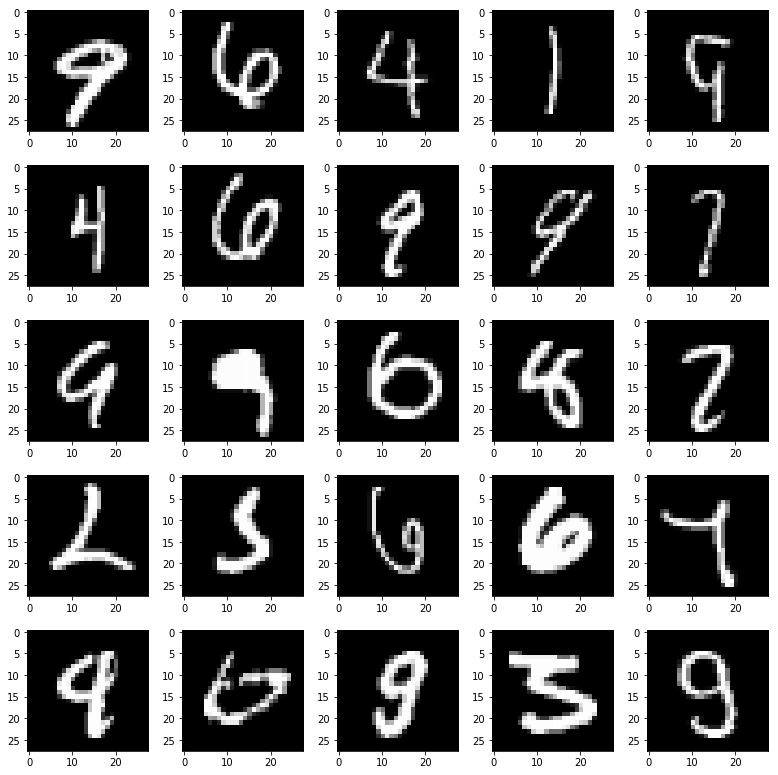

In [0]:
fig, ax = plt.subplots(5, 5, figsize = (12, 12))

fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
i = 0

for row in ax:
	for col in row:
		if i < 25:
			col.imshow(test_images[i].reshape(28,28), cmap='gray')
			i += 1

The below shows the actual class value and the predicted class value. 

In [0]:
for i in range(25):
    if i % 5 != 0:
        print(actual_classes[i], end=' ')
    else:
        print('\n')
        print(actual_classes[i], end=' ')
        
print('\n\n')        

for i in range(25):
    if i % 5 != 0:
        print(misclassified_classes[i], end=' ')
    else:
        print('\n')
        print(misclassified_classes[i], end=' ')



9 6 4 1 9 

4 6 9 9 7 

9 9 6 8 2 

2 5 6 6 7 

9 6 9 3 9 




4 4 1 5 5 

1 4 4 4 1 

4 3 0 5 7 

1 3 1 4 1 

4 0 3 5 3 